<div style="width: 400px; height: 160px;">
    <img src="rplogo_small.png" width="100%" height="100%" align="left">
</div>

###     TIPP - AAI Assignement (Machine Learning Fundamentals)<br>Due Date: 19 February 2020
###     Submitted By: <u>KOAY</u> SENG TIAN<br>Email: sengtian@yahoo.com


# Introduction
The [Pima](https://en.wikipedia.org/wiki/Pima_people) are a group of Native Americans living in Arizona. [Source](https://www.andreagrandi.it/2018/04/14/machine-learning-pima-indians-diabetes/) A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been the subject of many studies. 

This dataset was originally from the 'National Institute of Diabetes and Digestive and Kidney Diseases'.  The objective is to predict, based on diagnostic measurements whether a patient has diabetes.  Several constraints were placed on the selection of these instances from a larger database.  In particular, all patients here are females at least 21 years old of Pima Indian heritage.

__Data Source:__ [Kaggle](https://www.kaggle.com/kumargh/pimaindiansdiabetescsv)

# Data Understanding
The dataset includes data from 768 women with eight characteristics.   
- **Pregnancies:** Number of times pregnant
- **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure:** Diastolic blood pressure (mm Hg)
- **SkinThickness:** Triceps skin fold thickness (mm)
- **Insulin:** 2-Hour serum insulin (mu U/ml)
- **BMI:** Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction:** Diabetes pedigree function
- **Age:** Age (years)

The last column being the person was diagnosed with diabetes (1) or not (0).
- **Outcome:** Class variable (0 or 1)

In [1]:
# TIPP - AAI Assignment (Machine Learning Fundamentals)
# Date Due: 19 February 2020
# Submited By: KOAY SENG TIAN
# Email: sengtian@yahoo.com
#
# GitHub: https://github.com/koayst/rp_machinelearning_assignment
#
# load the modules/packages.
# If there is an error, need to install the modules/packages
# also list the version being used here
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle
import seaborn as sns
import sklearn

#instruction => pip install xgboost
import xgboost

import warnings
from platform import python_version

# for debugging purposes: in case want to know
# the versions of the modules being imported
#
# show the versions of modules/packages imported
# print('Version(s):\n')
# print('python =', python_version())

# print('mathplotlib =', matplotlib.__version__)
# print('numpy =', np.__version__)
# print('pandas =', pd.__version__)
# print('pickel = ', pickle.format_version)
# print('seaborn =', sns.__version__)
# print('sklearn =', sklearn.__version__)
# print('xgboost =', xgboost.__version__)
# print()

#change mode to 'jupyter' if running in jupyter notebook
#change mode to 'script' if running as a python script i.e. .py
#mode = 'script'
mode = 'jupyter'


# Load Dataset

In [2]:
#the file is found in the same directory as this jupyter notebook
#another file, pima-indians-diabetes.names for reference
def load_dataset():
    print('Load dataset.')

    filedir = 'data'
    filename='pima-indians-diabetes.csv'
    filepath = os.path.join(os.getcwd(), filedir)

    df = pd.read_csv(os.path.join(filepath, filename))
    print('-' + os.path.join(filepath, filename))
    
    if mode == 'jupyter':
        print('\n-Rows => {}, Columns => {}\n'.format(df.shape[0], df.shape[1]))
        print(df.head(5))
        print()
        print(df.tail(5))
        print()
        print(df.info())
        print()
    
    print()
    return df

# Prepare the Dataset

In [3]:
#check for null - looks like there is none
def prepare_dataset(df):
    print('Prepare dataset.')
    if mode == 'jupyter':
        print('-Perform checks:\n')
        print('-Any NULL value in the dataset (True=there is Null)?')
        print(df.isnull().values.any())

        print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-')
        print('-Null values count in each feature:\n')
        print(df.isnull().sum())

        #check for any cell that is missing in dataframe - look like no missing cell
        print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-')
        print('-Any cell is missing in table (True=there is missing cell)?')
        print(df.isna().any().any())
        print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-')
        print('-Check zero value cell in the table.')
        df.eq(0).sum()
    
    df[['Glucose', 'BloodPressure', 'SkinThickness', 
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = \
    df[['Glucose', 'BloodPressure', 'SkinThickness', 
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

    # use the median to fill out the zero value cells
    print('-Replace all zeros with median value.')
    df.fillna(df.median(axis=0), inplace=True)
    
    if mode == 'jupyter':
        print('-Zero values are replaced by its median.')
        print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-')
        print('-Check AGAIN for zero value cell.')
        df.eq(0).sum()
        
        descT = df.describe().transpose()
        cols = list(descT)

        #move 'max' column next to 'min' column for easier visual comparison
        cols.insert(cols.index('25%'), cols.pop(cols.index('max')))
        descT = descT.loc[:, cols]
        print(descT)
        print()
        
        df.hist(bins=20, figsize=(10,10))
        plt.show()

        #looking at the 'pregnancies' histogram, there zero value
        #This is reasonable as it is likely that a woman has never pregnant
        
        print('-Class imbalance visualisation.')

        #now show it as a horizontal bar chart using percentage
        sns.set(style="whitegrid")

        ax = sns.countplot(y="Outcome", data=df)
        ax.set_xlim(0, 600)

        total = len(df['Outcome'])

        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
        
        #plot the correlation as heatmap
        corr = df.corr(method='pearson')

        _, ax = plt.subplots(figsize=(8, 6))

        mask = np.triu(corr, k=1)
        sns.heatmap(corr, fmt=".2f", annot=True, vmin=-1, vmax=1, center= 0, cmap='RdBu_r', mask=mask, ax=ax)
        
        corr.nlargest(9, 'Outcome').Outcome
        # notice that order of feature importances are:
        
    print()
                

# Train the model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import model_selection

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def iterateAndTestModelAccuracy(classifier_testList, X_train, y_train, X_test, y_test):
    for model in classifier_testList: 
        np.random.seed(42)
        clf = model()
        clf.fit(X_train, y_train)
        predict = clf.predict(X_test)
        accu = roc_auc_score(y_test, predict)
        cm = confusion_matrix(y_test, predict)
        if mode == 'jupyter':
            print('-=-=-={}-=-=-='.format(model.__name__))
            print('-ROC AUC = {}%\n'.format(round(accu*100, 2)))
            print(pd.crosstab(y_test, predict, rownames=['True'], colnames=['Predicted'], margins=True))
        
def findModelBestParams(classifier, gParams, X_train, y_train):
    model = classifier()
    gs = GridSearchCV(estimator=model, 
                  param_grid=gParams, 
                  scoring='roc_auc',
                  cv=10,
                  n_jobs=-1)
    gs.fit(X_train, y_train)
    if mode == 'jupyter':
        print('-=-=-={}-=-=-=-'.format(classifier.__name__))
        print('-Best parameters => {}'.format(gs.best_params_))
        print('-Best score => {}'.format(gs.best_score_))
    return gs.best_params_

def train_model(cname, df):
    
    print('Train model.')
    
    rowsList=[]
    
    X = df[cname].values
    y = df.iloc[:, 8:].values
    y = np.squeeze(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df.Outcome)

    if mode == 'jupyter':
        print(X_train.shape)
        print(y_train.shape)
        print(X_test.shape)
        print(y_test.shape)
        print()
        
    print('-Scale the features.')
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    if mode == 'jupyter':
        print(type(X_train))
        print(type(X_test))
        print(X_train.shape)
        print(X_test.shape)
        print()
        
    print('-Search ideal model.')
    for model in [
        DummyClassifier,
        GaussianNB,
        KNeighborsClassifier,
        LogisticRegression,
        RandomForestClassifier,
        SVC,
        XGBClassifier]:

        kfold = model_selection.KFold(n_splits=10, random_state=42)
        classifier = model()
        result = model_selection.cross_val_score(classifier, X_train, y_train, scoring='roc_auc', cv=kfold)
        dict = {'Classifier': model.__name__, 'ROC_AUC': result.mean(), 'STD': result.std()}
        rowsList.append(dict)

    if mode == 'jupyter':
        dfModelRanking = pd.DataFrame(rowsList)
        print(dfModelRanking.sort_values(by='ROC_AUC', ascending=False))
        
    print('-Narrow to top 3 models.\n')
    clf_list = [
        XGBClassifier,
        LogisticRegression,
        GaussianNB
    ]
    
    if model == 'jupyter':
        iterateAndTestModelAccuracy(clf_list, X_train, y_train, X_test, y_test)
        
    gridParams= {
        'max_depth': [2],
        'min_child_weight': [1],
        'gamma': [0],
        'subsample': [0.8],
        'colsample_bytree' : [0.6],
        'verbosity' : [0]
    }

    print('-Find best paramters for XGClassifier (XGBoost).')
    xgb_bestParams = findModelBestParams(XGBClassifier, gridParams, X_train, y_train)
    xgb_classifier = XGBClassifier (**xgb_bestParams)
    xgb_classifier.fit(X_train, y_train)
    xgb_predict = xgb_classifier.predict(X_test)

    xgb_rocauc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:,1])
    cm = confusion_matrix(y_test, xgb_predict)
    if mode == 'jupyter':
        print('-=-=-=XGClassifier-=-=-=')
        print('ROC AUC = {}%'.format(round(xgb_rocauc * 100, 2)))
        pd.crosstab(y_test, xgb_predict, rownames=['True'], colnames=['Predicted'], margins=True)
        print()
        
    gridParams= {
        'penalty' : ['l1', 'l2'],
        'random_state' : [42]
    }

    print('-Find best paramters for LogisticRegression.')
    lr_bestParams = findModelBestParams(LogisticRegression, gridParams, X_train, y_train)
    lr_classifier = LogisticRegression(**lr_bestParams)
    lr_classifier.fit(X_train, y_train)
    lr_predict = lr_classifier.predict(X_test)

    lr_auc = roc_auc_score(y_test, lr_classifier.predict_proba(X_test)[:,1])
    cm = confusion_matrix(y_test, lr_predict)
    if mode == 'jupyter':
        print('-=-=-=LogisticRegression-=-=-=')
        print('ROC AUC = {}%'.format(round(lr_auc * 100, 2)))
        pd.crosstab(y_test, lr_predict, rownames=['True'], colnames=['Predicted'], margins=True)
        print()
    
    gridParams= {
    }
    print('-Find best paramters for GaussianNB.')
    gnb_bestParams = findModelBestParams(GaussianNB, gridParams, X_train, y_train)
    gnb_classifier = GaussianNB (**gnb_bestParams)
    gnb_classifier.fit(X_train, y_train)
    gnb_predict = gnb_classifier.predict(X_test)

    gnb_auc = roc_auc_score(y_test, gnb_classifier.predict_proba(X_test)[:,1])
    cm = confusion_matrix(y_test, gnb_predict)
    if mode == 'jupyter':
        print('-=-=-=GaussianNB-=-=-=')
        print('ROC AUC = {}%'.format(round(gnb_auc * 100, 2)))
        pd.crosstab(y_test, gnb_predict, rownames=['True'], colnames=['Predicted'], margins=True)
        print()
        
    if model == 'jupyter':
        print('Using XGBoost as a model to classify the dataset.')
        print()
        print('--- Metrices ---\n')
        print('XGBoost:')
        print(classification_report(y_true=y_test, y_pred=xgb_predict))
        print('-------------------------------------------------------')
        print('Logistic Regression:')
        print(classification_report(y_true=y_test, y_pred=lr_predict))
        print('-------------------------------------------------------')
        print('GaussianNB:')
        print(classification_report(y_true=y_test, y_pred=gnb_predict))
        print()
        
    bestAUC = { 'xgboost': 0, 'logisticregression' : 0, 'gaussianNB' : 0}
    xgb_probs = xgb_classifier.predict_proba(X_test)
    xgb_preds = xgb_probs[:,1]
    xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_preds)
    xgb_rocauc = auc(xgb_fpr, xgb_tpr)
    bestAUC['xgboost'] = xgb_rocauc
    if mode == 'jupyter':
        print(xgb_rocauc)

    lr_probs = lr_classifier.predict_proba(X_test)
    lr_preds = lr_probs[:,1]
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_preds)
    lr_rocauc = auc(lr_fpr, lr_tpr)
    bestAUC['logisticregression'] = lr_rocauc
    if mode == 'jupyter':
        print(lr_rocauc)

    gnb_probs = gnb_classifier.predict_proba(X_test)
    gnb_preds = gnb_probs[:,1]
    gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_preds)
    gnb_rocauc = auc(gnb_fpr, gnb_tpr)
    bestAUC['gaussianNB'] = gnb_rocauc
    if mode == 'jupyter':
        print(gnb_rocauc)

    if mode == 'jupyter':
        plt.figure(figsize=(6, 6))
        plt.plot([0, 1], [0, 1], 'r--')
        plt.plot(xgb_fpr, xgb_tpr, 'brown', label='XGBoost %.4f' % xgb_rocauc)
        plt.plot(lr_fpr, lr_tpr, 'g-', label='LRegression %.4f' % lr_rocauc)
        plt.plot(gnb_fpr, gnb_tpr, 'b-', label='GaussianNB %.4f' % gnb_rocauc)

        plt.legend()
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.show()
        
        print("Below show which features are important in the prediction.")
        xgboost.plot_importance(xgb_classifier).set_yticklabels(cname)
        plt.title("xgboost.plot_importance(model)")
        plt.show()
    
    print('-model is ' + max(bestAUC, key=bestAUC.get))
    print()
    return xgb_classifier, scaler


In [5]:
def save_model(model_filename, scaler_filename, classifier, scaler):
    print('Save model.')
    filedir = os.path.join(os.getcwd(), 'model')
    filepath = os.path.join(filedir, model_filename)
    pickle.dump (classifier, open(filepath, 'wb'))
    print(filepath)
    
    print('\nSave scaler.')
    scaler_filename = 'pima-indians-scaler.pkl'
    filedir = os.path.join(os.getcwd(), 'model')
    filepath = os.path.join(filedir, scaler_filename)
    pickle.dump (scaler, open(filepath, 'wb'))
    print(filepath)
    print()


In [6]:
def load_model(model_filename, scaler_filename):
    print('Load model.')
    filedir=os.path.join(os.getcwd(), 'model')
    filepath = os.path.join(filedir, model_filename)
    loaded_model = pickle.load (open(filepath, 'rb'))

    print('Load scaler.')
    filedir = os.path.join(os.getcwd(), 'model')
    filepath = os.path.join(filedir, scaler_filename)
    loaded_scaler = pickle.load(open(filepath, 'rb'))
    
    print()
    return loaded_model, loaded_scaler


In [7]:
def DiabetesLikelihood(data, loaded_model, loaded_scaler):

    data = loaded_scaler.transform([data])

    prediction = loaded_model.predict(data)
    if prediction[0] == 1:
        print('Diabetes risk is High')
    else:
        print('Diabetes risk is Low')
    confidence = loaded_model.predict_proba(data)
    print(confidence)
    print('Confidence: ' + str(round(confidence[0][prediction[0]] * 100, 2)) + "%\n")
    

In [8]:
cname = ['Glucose', 'BMI', 'Age', 'Pregnancies'] 
testdata = [
    [93, 30.4, 23, 1],
    [148, 33.6, 50, 6]
]


Note: Please ensure "xgboost" is installed before proceeding.
Instruction:
1) pip install xgboost
2) To supress warning: python -W ignore Pima_Indian.py

Menu

1) Load dataset.
2) Prepare dataset. 
3) Train model.
4) Save model.
5) Load model.
6) Test Model
0) Quit


Enter your selection (1-6, or 0 to quit) ?
1
Load dataset.
-C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Assignment_MachineLearningFundamental\TIPPAAI_ML_Fundamentals_Koay_Seng_Tian\data\pima-indians-diabetes.csv

-Rows => 768, Columns => 9

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0   

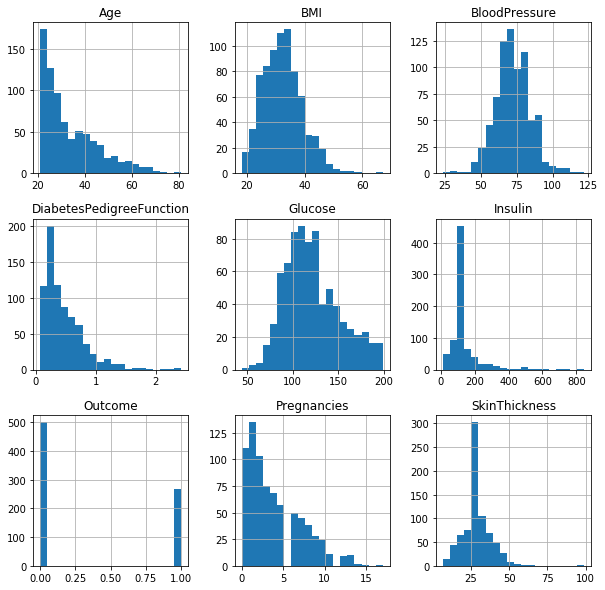

-Class imbalance visualisation.

Menu

1) Load dataset.
2) Prepare dataset. 
3) Train model.
4) Save model.
5) Load model.
6) Test Model
0) Quit


Enter your selection (1-6, or 0 to quit) ?
3
Train model.
(537, 4)
(537,)
(231, 4)
(231,)

-Scale the features.
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(537, 4)
(231, 4)

-Search ideal model.
               Classifier   ROC_AUC       STD
3      LogisticRegression  0.840028  0.050242
1              GaussianNB  0.838754  0.047571
6           XGBClassifier  0.820604  0.046226
5                     SVC  0.812427  0.055112
2    KNeighborsClassifier  0.794917  0.046037
4  RandomForestClassifier  0.785315  0.030423
0         DummyClassifier  0.469975  0.070675
-Narrow to top 3 models.

-Find best paramters for XGClassifier (XGBoost).
-=-=-=XGBClassifier-=-=-=-
-Best parameters => {'colsample_bytree': 0.6, 'gamma': 0, 'max_depth': 2, 'min_child_weight': 1, 'subsample': 0.8, 'verbosity': 0}
-Best score => 0.8282417714055466
-=-=-=XGClassifier

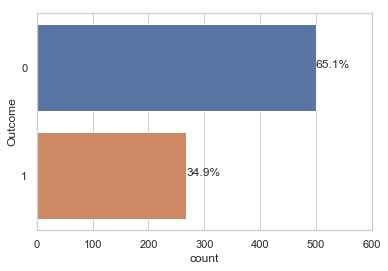

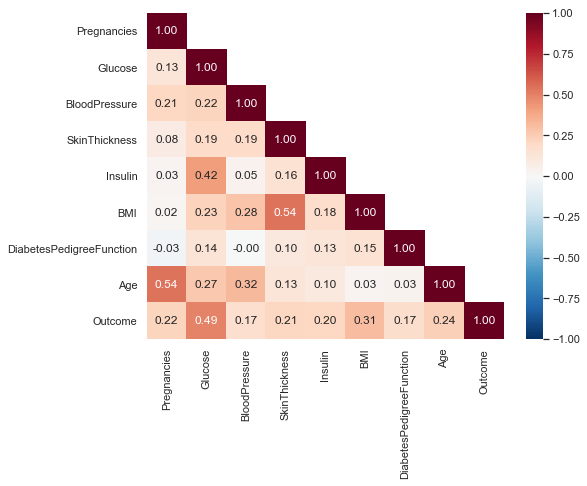

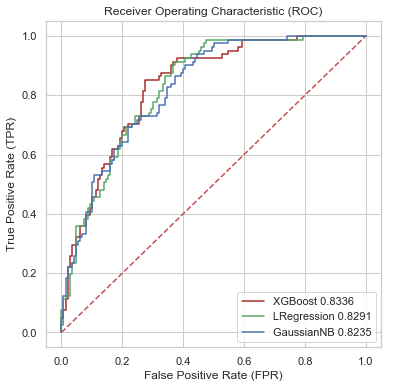

Below show which features are important in the prediction.


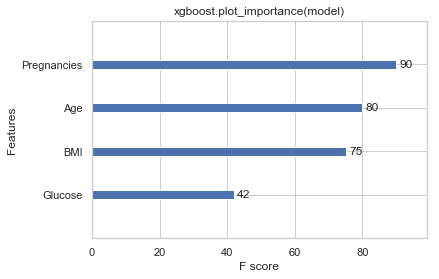

-model is xgboost

Menu

1) Load dataset.
2) Prepare dataset. 
3) Train model.
4) Save model.
5) Load model.
6) Test Model
0) Quit


Enter your selection (1-6, or 0 to quit) ?
4
Save model.
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Assignment_MachineLearningFundamental\TIPPAAI_ML_Fundamentals_Koay_Seng_Tian\model\pima-indians-xgboost.pkl

Save scaler.
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Assignment_MachineLearningFundamental\TIPPAAI_ML_Fundamentals_Koay_Seng_Tian\model\pima-indians-scaler.pkl

Menu

1) Load dataset.
2) Prepare dataset. 
3) Train model.
4) Save model.
5) Load model.
6) Test Model
0) Quit


Enter your selection (1-6, or 0 to quit) ?
5
Load model.
Load scaler.

Menu

1) Load dataset.
2) Prepare dataset. 
3) Train model.
4) Save model.
5) Load model.
6) Test Model
0) Quit


Enter your selection (1-6, or 0 to quit) ?
6
Glucose = 93, BMI = 30.4, Age = 23, Pregnancies = 1, 
Diabetes risk is Low
[[0.9120275  0.08797253]]
Confidence: 91.2%

Glucose 

In [9]:
print('=============================================================')
print('Note: Please ensure "xgboost" is installed before proceeding.')
print('Instruction:')
print('1) pip install xgboost')
print('2) To supress warning: python -W ignore Pima_Indian.py')
print('=============================================================\n')

while True:
    print('Menu\n')
    print('1) Load dataset.')
    print('2) Prepare dataset. ')
    print('3) Train model.')
    print('4) Save model.')
    print('5) Load model.')
    print('6) Test Model')
    print('0) Quit')
    print('\n\nEnter your selection (1-6, or 0 to quit) ?')
          
    choice = int(input())
    
    if choice == 0:
          break
    elif choice == 1:
          df = load_dataset()
    elif choice == 2:
          prepare_dataset(df)
    elif choice == 3:
          classifier, scaler = train_model (cname, df)
    elif choice == 4:
          save_model('pima-indians-xgboost.pkl', 'pima-indians-scaler.pkl', classifier, scaler)
    elif choice == 5:
          loaded_model, loaded_scaler = load_model('pima-indians-xgboost.pkl', 'pima-indians-scaler.pkl')
    elif choice == 6:
          for feature, value in zip(cname, testdata[0]):
              print (feature, '=', value, end=', ')
          print()
          DiabetesLikelihood(testdata[0], loaded_model, loaded_scaler)

          for feature, value in zip(cname, testdata[1]):
              print (feature, '=', value, end=', ')
          print()
          DiabetesLikelihood(testdata[1], loaded_model, loaded_scaler)
    else:
          continue